# Wk2 Trk3 Day 1
<br>

# Exercises: Regression
---
<br>

#### CSAA2022
<br>

#### Getting to use sklearn

Many of the algorithms we are going to use over the course of this week have been efficiently implemented in sklearn. 
 
**Tasks** : 

1. Import the linear regression package and plot the regression line for the Olympics data
    * you may want to use numpy to read the data
    * generate some testing points with numpy, hint: what function do we use to generate equally spaced points of data
    * plot predictions and real data
    
    
2. In the lectures we have looked at polynomial order models
    * To make your lives easier, scale the x values: x = (x-1896)/4
    * You can do that with sklearn by using PolynomialFeatures
    * Experiment with different orders of the Polynomial
    * What happens? 
    * Compare those models with the standard order linear model we have tried
    

In [450]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [451]:
olympic_100 = np.loadtxt("labData/olympic100m.txt", delimiter=",")
year, time = 0, 1
X = olympic_100[:, year].reshape(-1, 1)
y = olympic_100[:, time]
olympic_100_reg = LinearRegression().fit(X, y)
print(olympic_100_reg.coef_, olympic_100_reg.intercept_)
olympic_100_reg.score(X, y)

[-0.01333089] 36.416455902501056


0.8123516366876145

In [452]:
X_test = np.arange(1896, 1896+4*10, 4).reshape(-1, 1)
y_test = (olympic_100_reg.coef_ * X_test) + olympic_100_reg.intercept_
print((olympic_100_reg.predict(X_test).reshape(-1,1) == y_test).max())

True


<ipython-input-453-9ba527ba5788>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


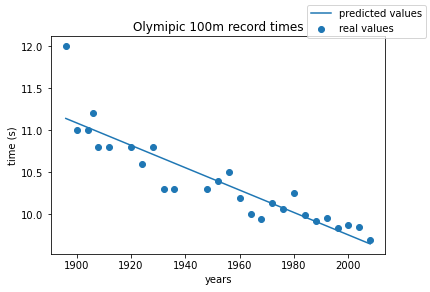

In [453]:
fig, ax = plt.subplots(1,1)
ax.scatter(X, y, label="real values")
ax.plot(X, olympic_100_reg.predict(X), label="predicted values")
ax.set_xlabel("years")
ax.set_ylabel("time (s)")
ax.set_title("Olymipic 100m record times")
fig.legend()
fig.show()

<ipython-input-209-79bb427f44e9>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.7107105639467172

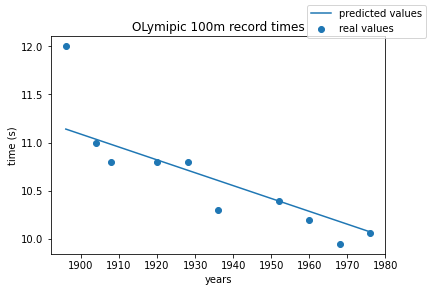

In [209]:
X_test = X[0:20:2, year].reshape(-1,1)
y_test = y[0:20:2]
fig, ax = plt.subplots(1,1)
ax.scatter(X_test, y_test, label="real values")
ax.plot(X_test, olympic_100_reg.predict(X_test), label="predicted values")
ax.set_xlabel("years")
ax.set_ylabel("time (s)")
ax.set_title("OLymipic 100m record times")
fig.legend()
fig.show()
olympic_100_reg.score(X_test, y_test)

<ipython-input-119-f89050b2d620>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


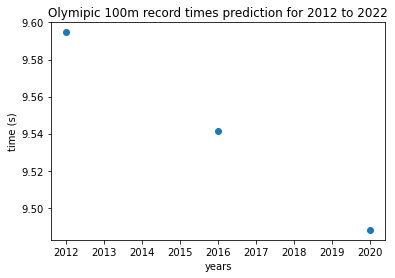

In [119]:
X_future = np.arange(2012, 2022, 4).reshape(-1,1)
fig, ax = plt.subplots(1,1)
ax.scatter(X_future, olympic_100_reg.predict(X_future))
ax.set_xlabel("years")
ax.set_ylabel("time (s)")
ax.set_title("Olymipic 100m record times prediction for 2012 to 2022")
fig.show()

## 2

In [364]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = (olympic_100[:, year] - olympic_100[0, year]) / 4
y = olympic_100[:, time]
olympic_poly = PolynomialFeatures(3).fit(X.reshape(-1,1))
X_transformed = olympic_poly.transform(X.reshape(-1,1))
X_transformed, X, olympic_poly

(array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00],
        [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00],
        [1.0000e+00, 2.5000e+00, 6.2500e+00, 1.5625e+01],
        [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01],
        [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01],
        [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02],
        [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02],
        [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02],
        [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02],
        [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03],
        [1.0000e+00, 1.3000e+01, 1.6900e+02, 2.1970e+03],
        [1.0000e+00, 1.4000e+01, 1.9600e+02, 2.7440e+03],
        [1.0000e+00, 1.5000e+01, 2.2500e+02, 3.3750e+03],
        [1.0000e+00, 1.6000e+01, 2.5600e+02, 4.0960e+03],
        [1.0000e+00, 1.7000e+01, 2.8900e+02, 4.9130e+03],
        [1.0000e+00, 1.8000e+01, 3.2400e+02, 5.8320e+03],
        [1.000

In [455]:
olympic_100_reg = LinearRegression().fit(X_transformed, y)

<ipython-input-460-926315e3e442>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


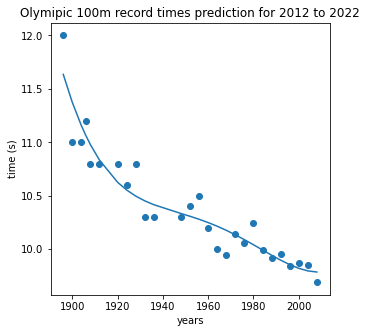

In [460]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(X, y)
ax.plot(X, olympic_100_reg.predict(X_transformed))
ax.set_xlabel("years")
ax.set_ylabel("time (s)")
ax.set_title("Olymipic 100m record times prediction for 2012 to 2022")

fig.show()

<ipython-input-429-86a5d75fab13>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


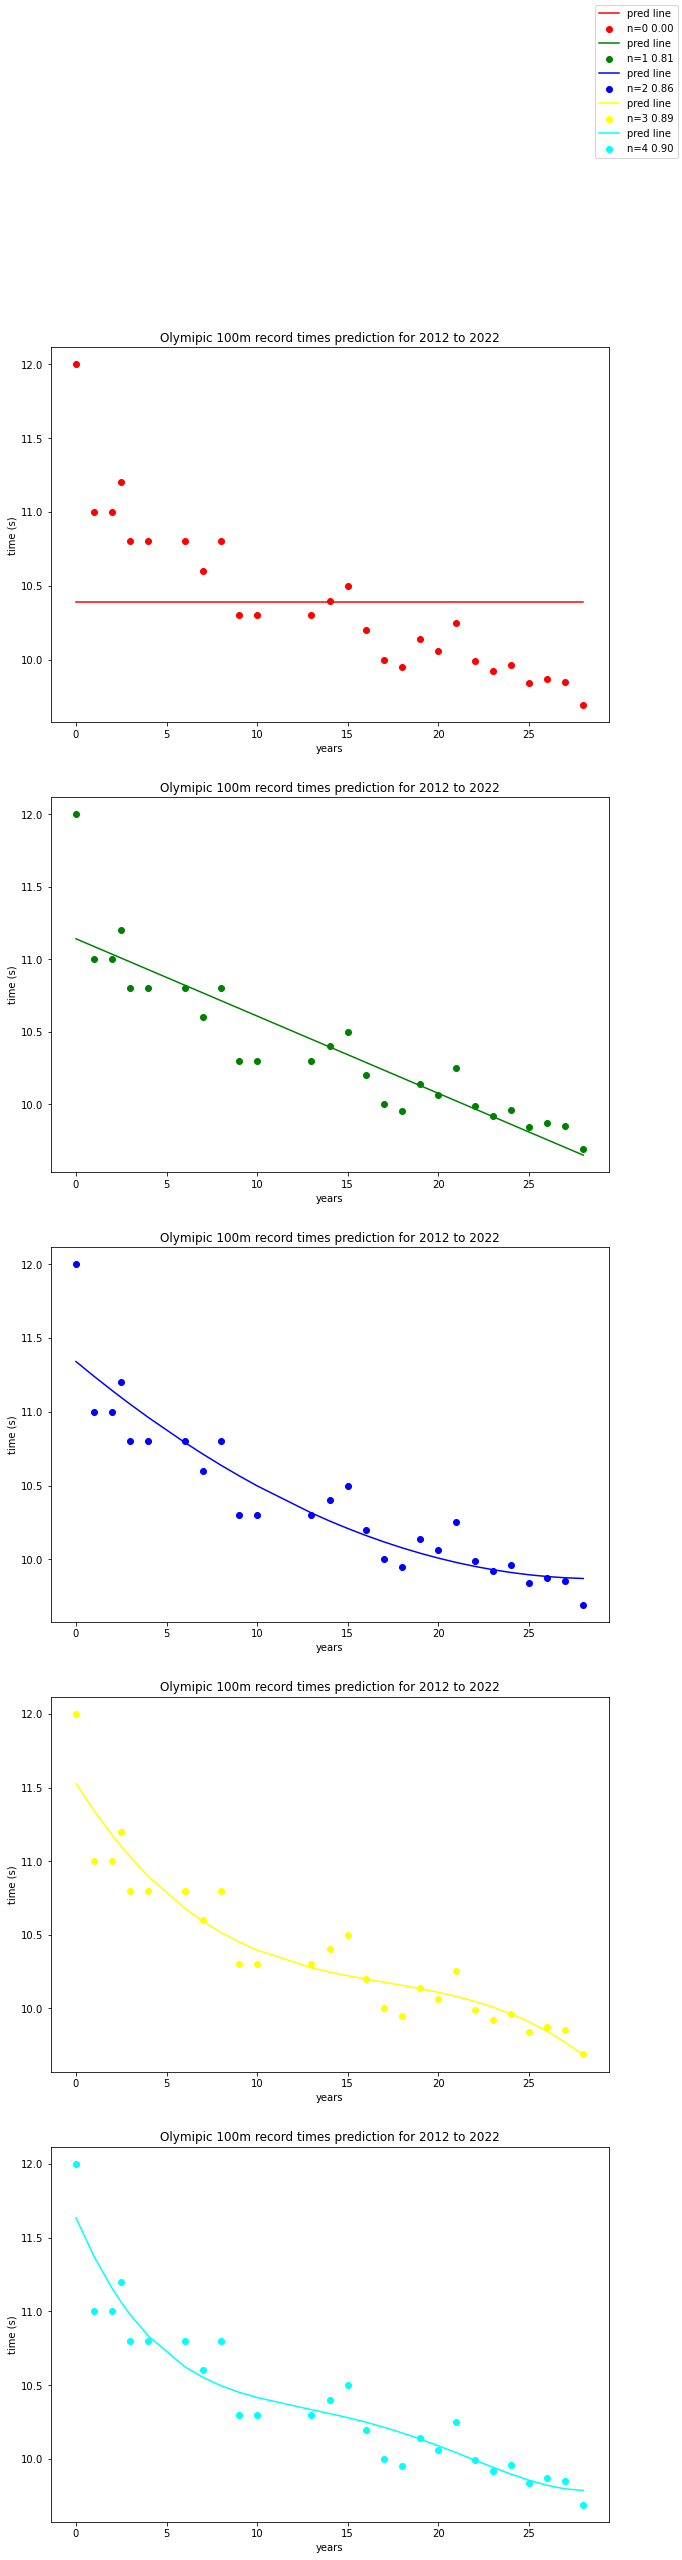

In [429]:
max_degree = 5
fig = plt.figure(figsize=(10,40))
ax = fig.subplots(max_degree,1)
colors = ["red", "green", "blue", "yellow", "cyan"]

for i in range(max_degree):
    olympic_poly = PolynomialFeatures(i)
    X_transformed = olympic_poly.fit_transform(X.reshape(-1,1))
    
    olympic_100_reg = LinearRegression().fit(X_transformed, y)
    score = olympic_100_reg.score(X_transformed, y)
    
    ax[i].scatter(X, y, label=f"n={i} {score:.2f}", color=colors[i%len(colors)])
    ax[i].plot(X, olympic_100_reg.predict(X_transformed), label=f"pred line", color=colors[i])
    
    ax[i].set_xlabel("years")
    ax[i].set_ylabel("time (s)")
    ax[i].set_title("Olymipic 100m record times prediction for 2012 to 2022")

fig.legend()
fig.show()

In [443]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy.random import shuffle
import numpy as np

diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [441]:
# no_samples = diabetes.target.size
# index = np.arange(no_samples)
# per_80_no_sample = int(no_samples * .8 )
# shuffle(index)
# X_train, X_test, y_train, y_test = (diabetes_data[index[:per_80_no_sample], :],
#                                     diabetes_data[index[per_80_no_sample:no_samples], :],
#                                     diabetes_target[index[:per_80_no_sample]],
#                                     diabetes_target[index[per_80_no_sample:]])

<ipython-input-438-b6370edd669d>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


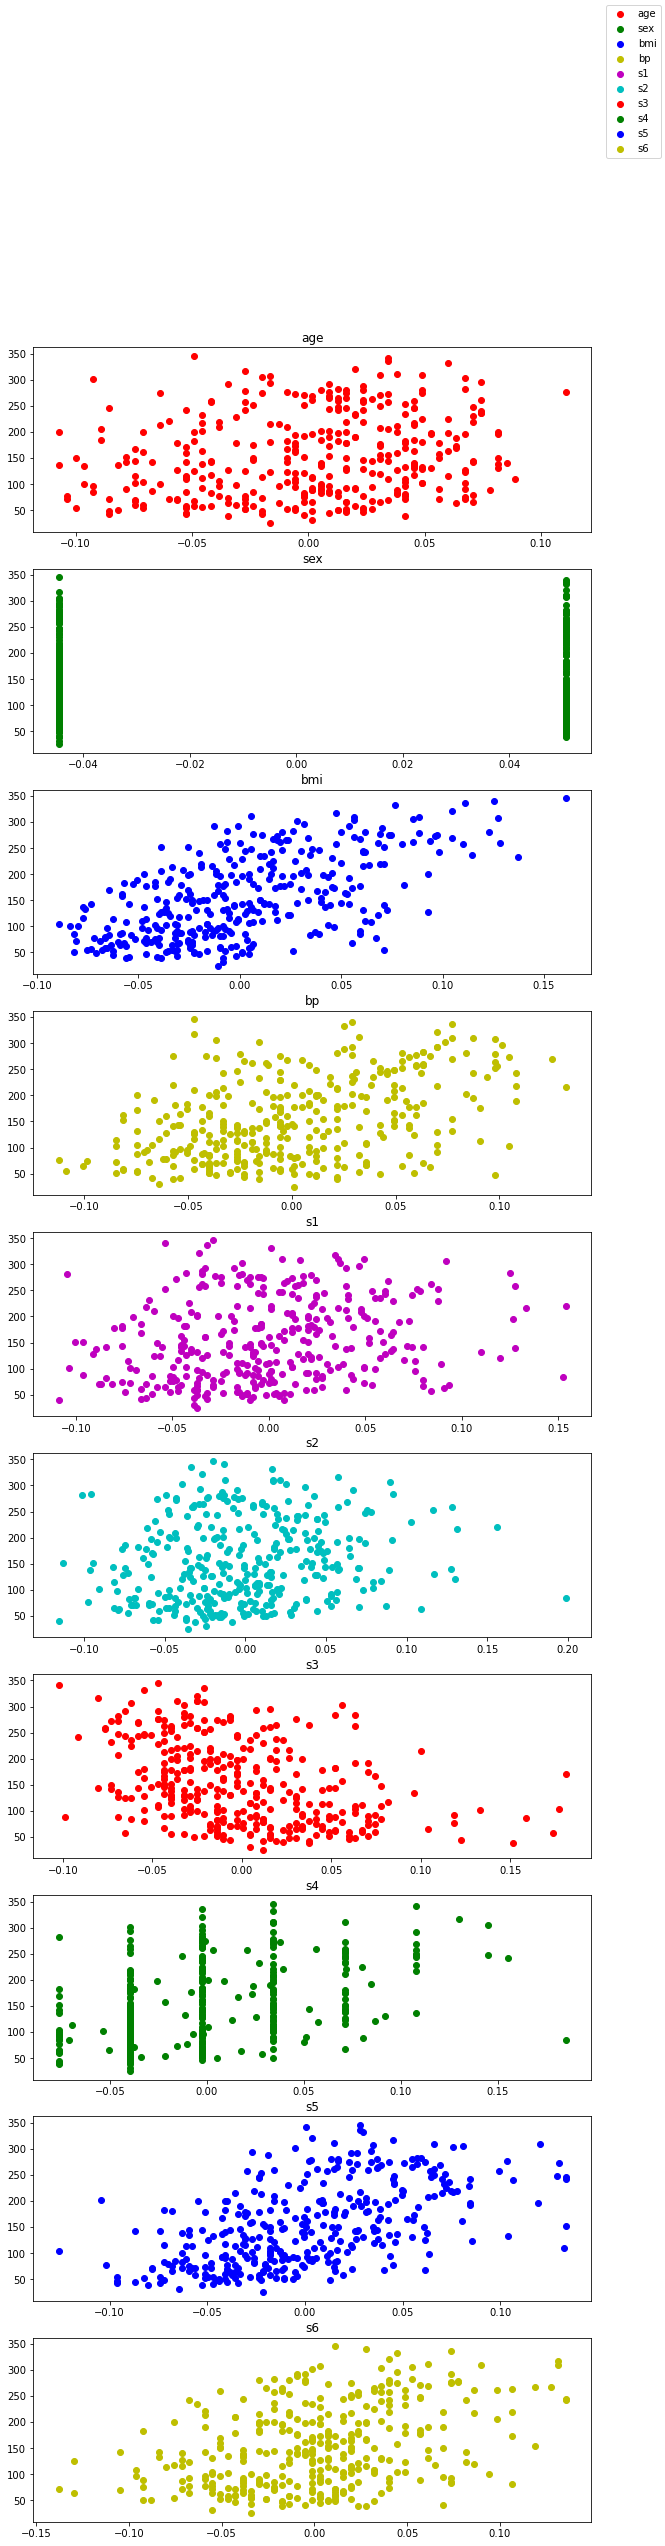

In [438]:
diabetes_data = diabetes.data
diabetes_target = diabetes.target
age, sex, bmi, bp, s1, s2, s3, s4, s5, s6 = np.arange(10)

X_train, X_test, y_train, y_test = train_test_split(
    diabetes_data, diabetes_target, test_size=0.2, random_state=42)

cols = {"age" : age, "sex" : sex, "bmi" : bmi, "bp" : bp, "s1" : s1,
        "s2" : s2, "s3" : s3, "s4" : s4, "s5" : s5, "s6" : s6}
colors = ['r', 'g', 'b', 'y', 'm', 'c'] *2
fig = plt.figure(figsize=(10,40))

ax = fig.subplots(10,1)
for col, index in cols.items():
    ax[index].scatter(X_train[:, index], y_train, label=f"{col}", color=colors[index])
    ax[index].set_title(f"{col}")

fig.legend()
fig.show()

In [434]:
max_degree = 5

for i in np.arange(1,max_degree+1):
    X_train_transformed = PolynomialFeatures(i).fit_transform(X_train)
    X_test_transformed = PolynomialFeatures(i).fit_transform(X_test)
    diabetes_reg = LinearRegression().fit(X_train_transformed, y_train)
    
    mse_test = mean_squared_error(y_true=y_train, y_pred=diabetes_reg.predict(X_train_transformed))
    mean_train = mean_squared_error(y_true=y_test, y_pred=diabetes_reg.predict(X_test_transformed))
    score_test = diabetes_reg.score(X_test_transformed, y_test)
    score_train = diabetes_reg.score(X_train_transformed, y_train)
    
    print(f"degree = {i}; mean squared error:" 
          f" test set =  {mse_test:<10.2f}"
          f" train set = {mean_train:<10.2f}"
          f" test score = {score_test:<10.2f}"
          f" train score = {score_train:<10.2f}"
         )

degree = 1; mean squared error: test set =  2868.55    train set = 2900.17    test score = 0.45       train score = 0.53      
degree = 2; mean squared error: test set =  2393.15    train set = 3095.78    test score = 0.42       train score = 0.61      
degree = 3; mean squared error: test set =  2216.07    train set = 105033.62  test score = -18.82     train score = 0.64      
degree = 4; mean squared error: test set =  0.00       train set = 146911.31  test score = -26.73     train score = 1.00      
degree = 5; mean squared error: test set =  0.00       train set = 143015.88  test score = -25.99     train score = 1.00      


In [448]:
reg = LinearRegression().fit(X_train, y_train)
print(mean_squared_error(y_true=y_train, y_pred=reg.predict(X_train)))
print(reg.coef_, reg.intercept_)

2874.9962354048785
[   4.67122678 -199.17739145  510.37916336  351.47289122 -786.41693642
  554.40257162   94.52454893  150.21491321  782.15537761  -22.53070461] 150.7971880317884
